In [1]:
#Importing libraries and dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('adult.data', names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


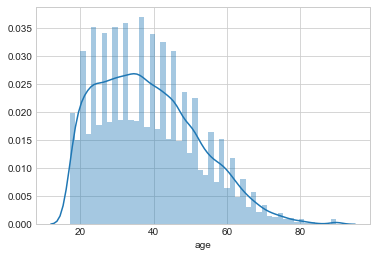

In [5]:
sns.distplot(df['age'])

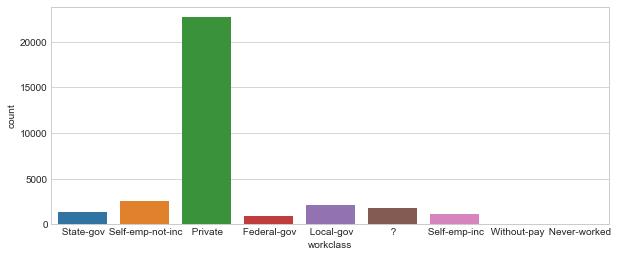

In [6]:
plt.figure(figsize = (10,4))
sns.countplot(df['workclass'] )

In [7]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        df[feature] = le.fit_transform(df[feature])

In [8]:
df['Total_capital'] = df['capital-gain'] - df['capital-loss']

C:\Users\puneeth\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


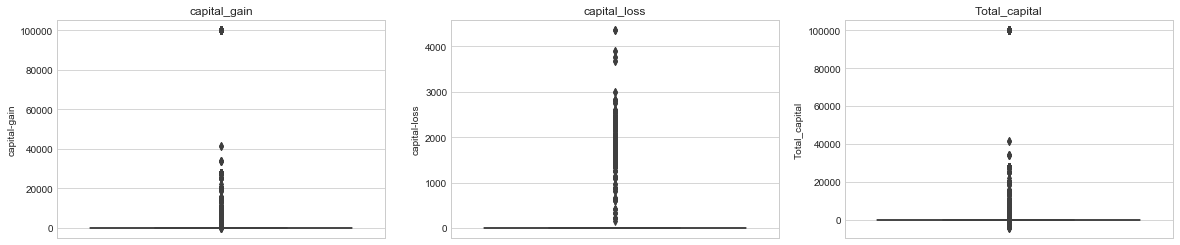

In [9]:
plt.figure(figsize = (20,4))

plt.subplot(1,3,1)
sns.boxplot(df['capital-gain'],orient = 'v')
plt.subplot(1,3,1).title.set_text('capital_gain')

plt.subplot(1,3,2)
sns.boxplot(df['capital-loss'],orient = 'v')
plt.subplot(1,3,2).title.set_text('capital_loss')

plt.subplot(1,3,3)
sns.boxplot(df['Total_capital'],orient = 'v')
plt.subplot(1,3,3).title.set_text('Total_capital')


plt.show()

In [10]:
df = df.drop(['capital-gain','capital-loss','education-num'],axis=1)

In [11]:
df['income'] = le.fit_transform(df['income'])

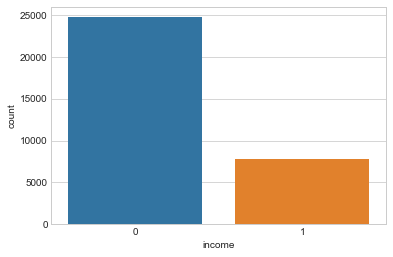

In [12]:
#targetvariable

sns.countplot(df['income'])

Model building

In [13]:
X = df.drop('income',axis=1)     
Y = df['income']

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1,stratify = Y)

C:\Users\puneeth\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


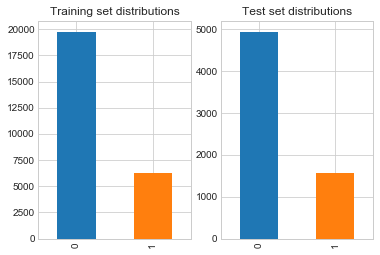

In [15]:
plt.subplot(1,2,1)
y_train.value_counts().plot(kind = 'bar')
plt.subplot(1,2,1).title.set_text('Training set distributions')

plt.subplot(1,2,2)
y_test.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2).title.set_text('Test set distributions')

plt.show()

Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=10000)

model_lr.fit(x_train, y_train)

y_predict_lr= model_lr.predict(x_test)


Accuracy of Logistic regression model is 77.7214801166897%


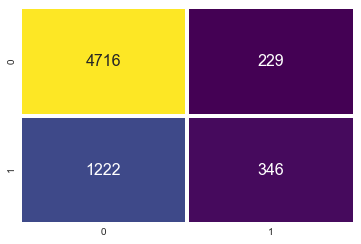

In [17]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

cm_lr = metrics.confusion_matrix(y_test, y_predict_lr,labels=[0,1])
sns.heatmap(cm_lr, annot= True, yticklabels = [0,1], xticklabels = [0,1], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g',cbar = False)

print("")

print("Accuracy of Logistic regression model is {}%".format(accuracy_score(y_test, y_predict_lr)*100))

K-Nearest Neighbours

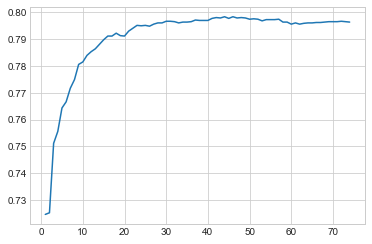

In [18]:
#checking what value of 'K' gives the highest accuracy on the testing dataset
from sklearn.neighbors import KNeighborsClassifier
scores =[]
for k in range(1,75):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))

plt.plot(range(1,75),scores)


In [19]:
model_KNN = KNeighborsClassifier(n_neighbors =45)

model_KNN.fit(x_train, y_train)

y_predict_KNN= model_KNN.predict(x_test)

Accuracy of K-Nearest Neighbours model is 79.42576385690158%


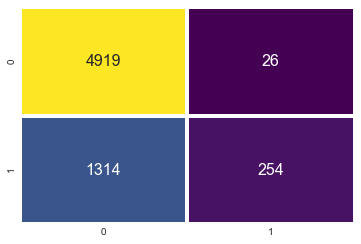

In [20]:
cm_knn = metrics.confusion_matrix(y_test, y_predict_KNN,labels=[0,1])
sns.heatmap(cm_knn, annot= True, yticklabels = [0,1], xticklabels = [0,1], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g',cbar = False)


print("Accuracy of K-Nearest Neighbours model is {}%".format(accuracy_score(y_test, y_predict_KNN)*100))

Decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

param_grid_dt = {'max_features': list(range(1,8)) , 'max_depth':list(range(1,7))}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(model_dt,param_grid_dt,cv=5)

gs.fit(x_train, y_train)

gs.best_params_

{'max_depth': 6, 'max_features': 7}

In [22]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=6, max_features= 6)

model_dt.fit(x_train, y_train)

y_predict_dt= model_dt.predict(x_test)

Accuracy of K-Nearest Neighbours model is 81.52924919391985%


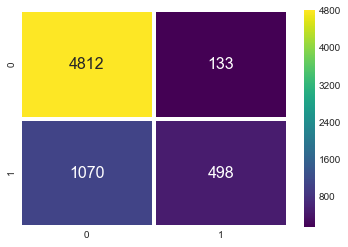

In [23]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


cm_dt = metrics.confusion_matrix(y_test, y_predict_dt,labels=[0,1])
sns.heatmap(cm_dt, annot= True, yticklabels = [0,1], xticklabels = [0,1], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')


print("Accuracy of K-Nearest Neighbours model is {}%".format(accuracy_score(y_test, y_predict_dt)*100))

Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier


model_rfcl = RandomForestClassifier()

param_grid_rfcl = {'max_depth': list(range(2,8)) , 'n_estimators':[50,100,150,250]}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(model_rfcl,param_grid_rfcl,cv=5)

gs.fit(x_train, y_train)

gs.best_params_

{'max_depth': 7, 'n_estimators': 250}

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_rfcl = RandomForestClassifier(max_depth=7, n_estimators= 250)

model_rfcl.fit(x_train, y_train)

y_predict_rfcl= model_rfcl.predict(x_test)

Accuracy of K-Nearest Neighbours model is 84.30830646399508%


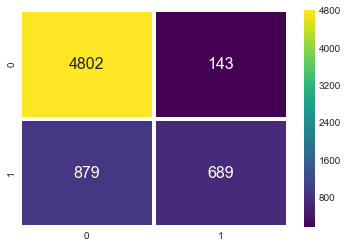

In [31]:
cm_rfcl = metrics.confusion_matrix(y_test, y_predict_rfcl,labels=[0,1])
sns.heatmap(cm_rfcl, annot= True, yticklabels = [0,1], xticklabels = [0,1], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')


print("Accuracy of K-Nearest Neighbours model is {}%".format(accuracy_score(y_test, y_predict_rfcl)*100))

Random forest turned out to be the best classifer with 84.3 % accuracy